<a href="https://colab.research.google.com/github/MithunSR/Gradient_Descent_Tutorial/blob/main/Cost_Function_Hinge_loss_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
The hinge loss function is a popular choice for optimizing support vector machine (SVM) models in binary classification tasks. It is designed to measure the performance of a model by penalizing misclassifications. The hinge loss function is particularly useful when dealing with linearly separable data, where the goal is to find a hyperplane that maximally separates the two classes. Mathematically, the hinge loss function is defined as the maximum of 0 and the difference between the predicted score and the true label multiplied by a margin parameter. The margin parameter controls the level of tolerance for misclassifications and affects the decision boundary of the SVM model. By minimizing the hinge loss, SVM models aim to find the optimal hyperplane that achieves a good trade-off between maximizing the margin and minimizing classification errors. The hinge loss function provides a robust and intuitive way to guide the training process of SVM models, making it a widely used cost function in machine learning.

#Develop Model

##Importing Libraries and Dataset:

We import the necessary libraries, including NumPy for numerical computations, Matplotlib for visualization, and scikit-learn's load_breast_cancer and train_test_split functions for loading the Breast Cancer Wisconsin dataset and splitting it into training and testing sets, respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


##Loading and Splitting the Dataset:

We load the Breast Cancer Wisconsin dataset using load_breast_cancer and assign the feature data to X and the target variable to y.
Then, we split the dataset into training and testing sets using train_test_split. Here, we assign 80% of the data to the training set (X_train and y_train) and 20% to the testing set (X_test and y_test).

In [2]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

# Extract the features and target variable
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Defining the Hinge Loss Function:

We define the hinge loss function, hinge_loss, which computes the loss for a given true label (y_true) and predicted label (y_pred) using the formula np.maximum(0, 1 - y_true * y_pred). This formula penalizes misclassifications by measuring the distance between the predicted label and the true label.

In [3]:
def hinge_loss(y_true, y_pred):
    loss = np.maximum(0, 1 - y_true * y_pred)
    return loss


##Defining the SVM Model:

We define the SVM model as a class, SVM, with the following methods:
`__init__`: Initializes the model with learning rate and number of iterations.
fit: Fits the SVM model to the training data using gradient descent.
predict: Makes predictions on new data based on the learned weights and bias.

In [4]:
class SVM:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Perform gradient descent
        for _ in range(self.num_iterations):
            scores = np.dot(X, self.weights) + self.bias
            gradients = np.zeros(X.shape[1])
            bias_gradient = 0
            
            for i, score in enumerate(scores):
                if y[i] * score < 1:
                    gradients += y[i] * X[i]
                    bias_gradient += y[i]
            
            self.weights -= self.learning_rate * gradients
            self.bias -= self.learning_rate * bias_gradient
    
    def predict(self, X):
        scores = np.dot(X, self.weights) + self.bias
        predictions = np.sign(scores)
        return predictions


##Training the SVM Model:

We create an instance of the SVM model, svm_model, with the specified learning rate and number of iterations.
We then call the fit method on svm_model to train the model on the training data (X_train and y_train).

In [5]:
# Create an SVM model instance
svm_model = SVM(learning_rate=0.01, num_iterations=1000)

# Train the SVM model
svm_model.fit(X_train, y_train)




##Making Predictions and Calculating Hinge Loss:

We use the trained SVM model to make predictions on the test set (X_test) by calling the predict method. The predicted labels are assigned to y_pred.
We calculate the hinge loss on the test set by calling the hinge_loss function with the true labels (y_test) and predicted labels (y_pred). The hinge loss is stored in the loss variable.

In [6]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the hinge loss on the test set
loss = hinge_loss(y_test, y_pred)




##Printing the Average Hinge Loss:

We calculate the average hinge loss by taking the mean of the hinge loss values using np.mean(loss).
Finally, we print the average hinge loss.

In [7]:
# Print the average hinge loss
average_loss = np.mean(loss)
print('Average Hinge Loss:', average_loss)

Average Hinge Loss: 1.6228070175438596


#Model for the Iris dataset

Accuracy: 0.3


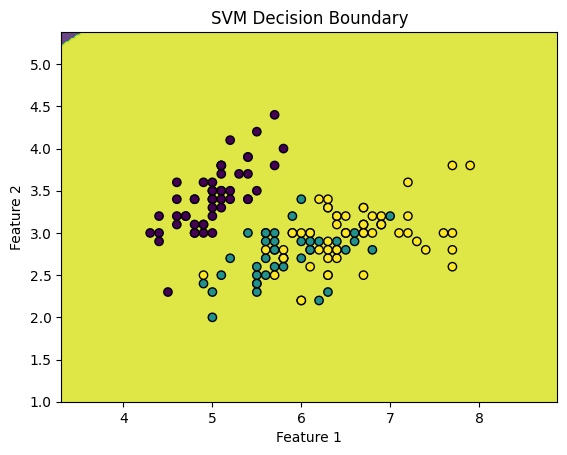

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class SVM:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Perform gradient descent
        for _ in range(self.num_iterations):
            distances = 1 - y * (np.dot(X, self.weights) + self.bias)
            distances[distances < 0] = 0  # Set negative distances to zero
            gradients = -np.dot(X.T, y * distances) / n_samples
            bias_gradient = -np.sum(y * distances) / n_samples
            
            self.weights -= self.learning_rate * gradients
            self.bias -= self.learning_rate * bias_gradient
    
    def predict(self, X):
        scores = np.dot(X, self.weights) + self.bias
        predictions = np.sign(scores)
        return predictions

# Create an SVM model instance
svm_model = SVM(learning_rate=0.01, num_iterations=1000)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)

# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()
